# Titanic

- https://www.kaggle.com/c/titanic

<img src="../../img/Screen Shot 2019-03-20 at 11.01.04 PM.png" width="700">

- Titanic에 탑승한 승객 정보를 승객의 구출 여부를 결정

<img src="../../img/Screen Shot 2019-03-20 at 10.31.05 PM.png" width="700">

<img src="../../img/Screen Shot 2019-03-20 at 10.32.38 PM.png" width="700">

- Data는 Training set과 Test set을 제공
- Train set으로 모델을 만든 후 Test set에 적용
- 결과제출은 [ID, 생존예측] 형태로 제출
- 제출된 결과를 바탕으로 accuracy 점수로 등수를 산정함
- 분석가들은 기존 자신들이 시도했던 다양한 분석 방법을 사이트를 통해서 공유하고 있음

- https://www.kaggle.com/c/titanic/data

<img src="../../img/Screen Shot 2019-03-20 at 11.01.27 PM.png" width="700">

Train set에는 살았는지 죽었는지가 있지만, Test set에는 살았는지 죽었는지에 대한 정보가 없다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## 1. Load dataset

### Load train set & test set

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Change index to 'PassengerId'

In [5]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_index = train_df.index
test_index = test_df.index

### Make train label - y_train

In [9]:
y_train_df = train_df.pop("Survived")

In [10]:
y_train_df.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

## 2. Data preproecessing

### float format for output value

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Check null value - isnull()

In [12]:
train_df.isnull().sum() / len(train_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.20
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.77
Embarked   0.00
dtype: float64

In [13]:
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

Cabin column에 너무 많은 결측치가 있기 때문에 먼저 Drop으로 없애버리자!

### Drop Cabin

In [14]:
del train_df["Cabin"]
del test_df["Cabin"]

### Combine train set & test set

전처리를 해줄 때는 train set, test set 모두 같은 방식으로 해주어야 한다. 

In [15]:
all_df = train_df.append(test_df)

In [16]:
all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S


In [17]:
len(all_df)

1309

### Check null value again

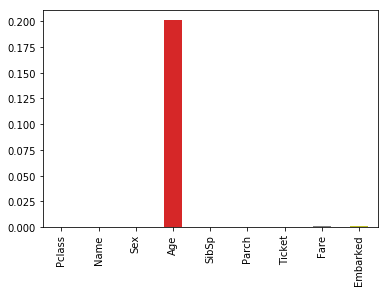

In [18]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

Age가 Nan값이 있긴 하지만, 20%정도이기 때문에 그냥 두고 진행해도 될 것 같다.

### Drop Name, Ticket

In [19]:
del all_df["Name"]
del all_df["Ticket"]

In [20]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


### One-Hot Encoding - Sex

In [21]:
all_df["Sex"] = all_df["Sex"].replace({"male":0, "female":1})

In [22]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


### One-Hot Encoding - Embarked

Embarked - 어느 항구에서 탑승 했는가?

In [23]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99})

In [25]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99])

In [26]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [27]:
pd.get_dummies(all_df["Embarked"], prefix="embarked") # prefix - 접두사

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,1,0,0,0
8,1,0,0,0
9,1,0,0,0


### Merge original all_df & one-hot encoding Embarked to check

In [28]:
matrix_df = pd.merge(all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"), 
                     left_index=True, right_index=True)

In [29]:
matrix_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0


### Check correlation

In [30]:
matrix_df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


### Check Age about Pclass

Pclass는 그 사람이 탄 자리를 말한다.

In [31]:
all_df.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

- 1등급 탄 사람의 평균 나이는 39.16세
- 2등급 탄 사람의 평균 나이는 29.51세
- 3등급 탄 사람의 평균 나이는 24.82세

로 나타났기 때문에 20% 정도 비어져있는 Age column의 Nan값들을 mean값을 통해 채워넣을 수 있다.

### Add null value of Age

그렇다면 이제 각각의 Pclass 등급에 따라서 Age에 비어있는 값들을 채워넣자!

In [32]:
all_df.loc[(all_df["Pclass"] == 1) & (all_df["Age"].isnull()), "Age"] # [row, column]

PassengerId
32     nan
56     nan
65     nan
167    nan
169    nan
186    nan
257    nan
271    nan
285    nan
296    nan
299    nan
307    nan
335    nan
352    nan
376    nan
458    nan
476    nan
508    nan
528    nan
558    nan
603    nan
634    nan
670    nan
712    nan
741    nan
767    nan
794    nan
816    nan
840    nan
850    nan
914    nan
933    nan
1038   nan
1040   nan
1060   nan
1083   nan
1097   nan
1158   nan
1182   nan
Name: Age, dtype: float64

In [33]:
all_df.loc[(all_df["Pclass"] == 1) & (all_df["Age"].isnull()), "Age"] = 39.16

In [34]:
all_df.loc[(all_df["Pclass"] == 2) & all_df["Age"].isnull() , "Age"] = 29.51

In [35]:
all_df.loc[(all_df["Pclass"] == 3) & all_df["Age"].isnull(), "Age"] = 24.82

### Check null value again

In [36]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

Fare에 대해서 1개의 null값이 발견되었다. Age에서 했던 방법과 똑같이 해서 채워주자.

### Add null value of Fare

In [37]:
all_df.groupby("Pclass")["Fare"].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [38]:
all_df[all_df["Fare"].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.50,0,0,nan,0


In [39]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 13.30

### One-Hot Encoding - Pclass

In [40]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A",2:"B",3:"C"})

In [41]:
all_df = pd.get_dummies(all_df)

In [42]:
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,0,1
2,1,38.00,1,0,71.28,1,1,0,0
3,1,26.00,0,0,7.92,0,0,0,1
4,1,35.00,1,0,53.10,0,1,0,0
5,0,35.00,0,0,8.05,0,0,0,1


### Remove Embarked from original all_df

In [43]:
del all_df["Embarked"]

In [44]:
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1
2,1,38.00,1,0,71.28,1,0,0
3,1,26.00,0,0,7.92,0,0,1
4,1,35.00,1,0,53.10,1,0,0
5,0,35.00,0,0,8.05,0,0,1


### Merge original all_df & one-hot encoding Embarked

In [45]:
all_df = pd.merge(all_df, matrix_df[["embarked_0", "embarked_1", "embarked_2", "embarked_99"]], 
                  left_index=True, right_index=True)

### Divide train_df & test_df

위에서 만들어준 train_index, test_index를 통해 다시 나눠준다.

In [46]:
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [47]:
train_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,1,1,0,0,0
4,1,35.00,1,0,53.10,1,0,0,1,0,0,0
5,0,35.00,0,0,8.05,0,0,1,1,0,0,0


In [48]:
test_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,1,0
893,1,47.00,1,0,7.00,0,0,1,1,0,0,0
894,0,62.00,0,0,9.69,0,1,0,0,0,1,0
895,0,27.00,0,0,8.66,0,0,1,1,0,0,0
896,1,22.00,1,1,12.29,0,0,1,1,0,0,0


## 3. Build Model

### Put x_data & y_data

In [49]:
x_data = train_df.values
y_data = y_train_df.values

In [50]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [51]:
y_data.shape

(891,)

### Load LogisticRegression & Train data

In [52]:
reg = LogisticRegression()
reg.fit(x_data, y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
print("score: {:.3f}".format(reg.score(x_data, y_data)))

score: 0.811


In [54]:
reg.intercept_ # Independent term in the linear model

array([0.18829673])

In [55]:
reg.coef_ # Estimated coefficients for the linear regression problem

array([[ 2.60750667e+00, -4.07586675e-02, -3.25647165e-01,
        -8.49180072e-02,  2.48637602e-03,  1.11465026e+00,
         1.52999426e-01, -1.07935296e+00, -2.45258159e-01,
         1.66095722e-01,  6.65915850e-02,  2.00867586e-01]])

### Predict with Test data

In [56]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [57]:
x_test = test_df.values

In [58]:
y_test = reg.predict(x_test)

In [59]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Concat Test data & predicted results

In [60]:
result = np.concatenate((test_index.values.reshape(-1,1),
                         reg.predict(x_test).reshape(-1,1)), axis=1)

In [61]:
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]])

In [62]:
df_submssion = pd.DataFrame(result, columns=["PassengerId","Survived"])

In [63]:
df_submssion.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [64]:
df_submssion.to_csv("submission_result.csv", index=False)